In [ ]:
#######################################################################
# Copyright (C)                                                       #
# 2016-2018 Shangtong Zhang(zhangshangtong.cpp@gmail.com)             #
# 2016 Kenta Shimada(hyperkentakun@gmail.com)                         #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.table import Table

In [2]:
WORLD_SIZE = 5
A_POS = [0, 1]
A_PRIME_POS = [4, 1]
B_POS = [0, 3]
B_PRIME_POS = [2, 3]
DISCOUNT = 0.9

# left, up, right, down
ACTIONS = [
    np.array([0, -1]),
    np.array([-1, 0]),
    np.array([0, 1]),
    np.array([1, 0])]

ACTION_PROB = 0.25

In [3]:
def step(state, action):
    if state == A_POS:
        return A_PRIME_POS, 10
    if state == B_POS:
        return B_PRIME_POS, 5
    
    next_state = (np.array(state) + action).tolist()
    x, y = next_state
    if x < 0 or x >= WORLD_SIZE or y < 0 or y >= WORLD_SIZE:
        reward = -1.0
        next_state = state
    else:
        reward = 0
    return next_state, reward

def draw_image(image):
    fig, ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax, bbox=[0, 0, 1, 1])

    nrows, ncols = image.shape
    width, height = 1.0 / ncols, 1.0 / nrows

    # Add cells
    for (i, j), val in np.ndenumerate(image):
        # add state labels
        if [i, j] == A_POS:
            val = str(val) + " (A)"
        elif [i, j] == A_PRIME_POS:
            val = str(val) + " (A')"
        elif [i, j] == B_POS:
            val = str(val) + " (B)"
        elif [i, j] == B_PRIME_POS:
            val = str(val) + " (B')"
        
        tb.add_cell(i, j, width, height, text=val, loc='center', facecolor='white')
    
    # Row and column labels...
    for i in range(len(image)):
        tb.add_cell(i, -1, width, height, text=i+1, loc='right', edgecolor='none')
        tb.add_cell(-1, i, width, height/2, text=i+1, loc='center', edgecolor='none')

    ax.add_table(tb)
    plt.show()

In [4]:
def figure_3_2():
    value = np.zeros((WORLD_SIZE, WORLD_SIZE))
    while True:
        # keep iteration until convergence
        new_value = np.zeros_like(value)
        for i in range(WORLD_SIZE):
            for j in range(WORLD_SIZE):
                for action in ACTIONS:
                    (next_i, next_j), reward = step([i, j], action)
                    # bellman equation
                    new_value[i, j] += ACTION_PROB * (reward + DISCOUNT * value[next_i, next_j])

        if np.sum(np.abs(value - new_value)) < 1e-4:
            draw_image(np.round(value, decimals=1))
            break
        value = new_value
    

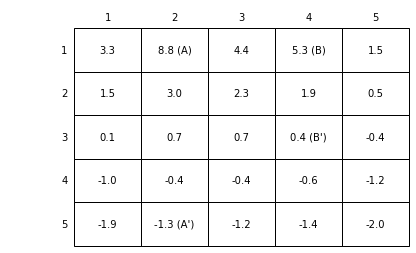

In [5]:
figure_3_2()

In [6]:
def figure_3_2_linear_system():
    """Here we solve the linear system of equations to find the exact solution.
    We do this by filling the coefficients for each of the states with their respective right side constant.
    """
    A = -1 * np.eye(WORLD_SIZE * WORLD_SIZE)
    b = np.zeros(WORLD_SIZE * WORLD_SIZE)
    for i in range(WORLD_SIZE):
        for j in range(WORLD_SIZE):
            s = [i, j]  # current state
            index_s = np.ravel_multi_index(s, (WORLD_SIZE, WORLD_SIZE))
            for a in ACTIONS:
                s_, r = step(s, a)
                index_s_ = np.ravel_multi_index(s_, (WORLD_SIZE, WORLD_SIZE))
                A[index_s, index_s_] += ACTION_PROB * DISCOUNT
                b[index_s] -= ACTION_PROB * r
    
    x = np.linalg.solve(A, b)
    draw_image(np.round(x.reshape(WORLD_SIZE, WORLD_SIZE), decimals=1))

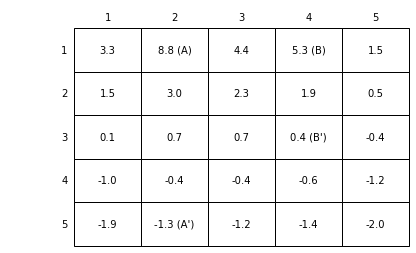

In [7]:
figure_3_2_linear_system()